# Analyzing Pyxis Results

The following notebook performs analyses of `pyxis` results to HOMER's `findMotifsGenome.pl`, such as by generating visualizations which compare results, runtimes, and sequence logos.

Note: As mentioned in `BenchmarkPyxis.ipynb`, the reference genome `hg19.fa` required for running commands with the ISL1 dataset is not included in the `pyxis` repository due to its large size. 

If you are interested in running these  commands with the ISL1 dataset (as well as several of the commands in `BenchmarkPyxis.ipynb`), please install `hg19.fa.gz` [here](https://hgdownload.soe.ucsc.edu/goldenPath/hg19/bigZips/) and move it into the `benchmark` directory of `pyxis`. Be sure to also decompress the file before running `pyxis` on it.

## I. Direct Results of *pyxis* vs. HOMER's *findMotifsGenome.pl*

In [1]:
%cd ..

/home/esquan/final_project/pyxis


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyfaidx
import pyxis.myutils
import random
import scipy.stats
import sys

In [3]:
!python setup.py install --user > path.txt 2> /dev/null
# determining where pyxis script installed to, and saving that path to export later
with open('path.txt', 'r') as file:
    for line in file:
        if 'Installing pyxis script to' in line:
            path = line.split()[-1]
            f = open("scriptpath.txt", "w")
            f.write(path)
            f.close()
            break

### A. Example Test Data Results

In [48]:
%%bash
# HOMER - Check homer-results/example-data/homerResults.html for results
findMotifsGenome.pl example-files/peaks.bed example-files/ref.fa homer-results/example-data -size given -len 11


	Position file = example-files/peaks.bed
	Genome = example-files/ref.fa
	Output Directory = homer-results/example-data
	Using actual sizes of regions (-size given)
	Fragment size set to given
	Motif length set at 11,
	Using Custom Genome
	Peak/BED file conversion summary:
		BED/Header formatted lines: 10
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 10
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background fragment size set to 21 (avg size of targets)
	Background files for 21 bp fragments found.
!!!! Might have something wrong with preparsed files
!!!! Rerun and add "-preparse" to the command line to force recreation of the files
	Custom genome sequence file: example-files/ref.fa

	Extracting sequences from file: example-files/ref.fa
	Looking for peak sequences in a 

In [7]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# pyxis - Check pyxis_enrichments.tsv for results
pyxis example-files/peaks.bed example-files/ref.fa example-files/test.pwms
printf 'Pyxis Enrichment Results:\n'
cat pyxis_enrichments.tsv

Background not specified. Generating background sequences from reference genome...
Calculating thresholds for each PWM...
[1/5] .... 
[2/5] .... 
[3/5] .... 
[4/5] .... 
[5/5] .... Done.

Performing motif enrichment...
[1/5] .... 
[2/5] .... 
[3/5] .... 
[4/5] .... 
[5/5] .... Done.

Creating output file 'enrichment_results.tsv'...
....
....
....
....
.... Done.


Pyxis has run successfully, please check 'pyxis_enrichments.tsv' for motif enrichment info!
If '-s' or '--seqlogo' was specified, the motif sequence logos should be in your directory.

Pyxis Enrichment Results:
motif_name	pval	log_pval	num_peak_motif	pct_peak_motif	num_bg_motif	pct_bg_motif	enriched_status
BACH2_HUMAN.H11MO.0.A	1.0	0.0	3	0.3	2	0.2	Non-sig
ALX3_HUMAN.H11MO.0.D	1.0	0.0	0	0.0	0	0.0	Non-sig
ELK1_HUMAN.H11MO.0.B	1.0	0.0	0	0.0	0	0.0	Non-sig
KAISO_HUMAN.H11MO.1.A	1.0	0.0	4	0.4	3	0.3	Non-sig
MLX_HUMAN.H11MO.0.D	1.0	0.0	1	0.1	0	0.0	Non-sig


Top sequence logos outputted by HOMER for example test data: 

RBP1-LIKE(RRM)


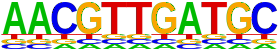

pho


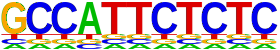

TRPS1(Zf)


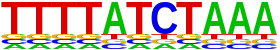

HNF6(Homeobox)


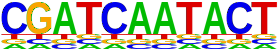

nub


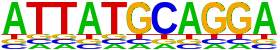

In [5]:
from IPython.display import SVG, display

# Logos for HOMER
## Verify with homerResults.html that the motif names printed match the motif. It is possible the output motifs may change
## in the future due to being false positives with very high p-values.
print('Top sequence logos outputted by HOMER for example test data: \n')
print('RBP1-LIKE(RRM)')
display(SVG('homer-results/example-data/homerResults/motif1.logo.svg'))

print('pho')
display(SVG('homer-results/example-data/homerResults/motif2.logo.svg'))

print('TRPS1(Zf)')
display(SVG('homer-results/example-data/homerResults/motif3.logo.svg'))

print('HNF6(Homeobox)')
display(SVG('homer-results/example-data/homerResults/motif4.logo.svg'))

print('nub')
display(SVG('homer-results/example-data/homerResults/motif5.logo.svg'))

***Sequence Logos From Pyxis for Example Data:***

| Name of Motif | Sequence Logo |
| :---: | :-----------------: |
| ALX3_HUMAN.H11MO.0.D | <img src="../ALX3_HUMAN.H11MO.0.D_pyxis_logo.png" alt="ALX3_example_pyxis_logo" width="250"/> |
| BACH2_HUMAN.H11MO.0.A | <img src="../BACH2_HUMAN.H11MO.0.A_pyxis_logo.png" alt="BACH2_example_pyxis_logo" width="250"/> |
| ELK1_HUMAN.H11MO.0.B | <img src="../ELK1_HUMAN.H11MO.0.B_pyxis_logo.png" alt="ELK1_example_pyxis_logo" width="250"/> |
| KAISO_HUMAN.H11MO.1.A | <img src="../KAISO_HUMAN.H11MO.1.A_pyxis_logo.png" alt="KAISO_example_pyxis_logo" width="250"/> |

*(Note: You will need to run `pyxis` specific to the example data command above before seeing the sequence logos relevant to this data. If you run `pyxis` in the next section on the ISL1 data then come back and run this Markdown, there is a chance these logos may change.)*

As you can see, the enriched motifs found are extremely different from one another for these example test files. This is mostly due to **two reasons**: 

1. `HOMER` scans its entire database for the motifs that are most enriched in the given peak sequences, and outputs in its results some of the top ones. However, in `pyxis`, the functionality is a little different. You instead need to input your own file of known PWMs for motifs of interest, and then the tool will determine if these motifs are significantly enriched in the input peaks or not.


2. We were not really expecting to find any significantly enriched motifs in these example test files, given that the peak sequences and reference genome are completely random and very small in size. So in the case of `HOMER`, the top enriched motifs they outputted were moreso random and were even marked as possible false positives. Their p-values were non-significant and around 0.1 to 1. Similarly, `pyxis` did not find any of the motifs as significant either, with high p-values.

### B. ISL1 Dataset Results

In [6]:
%%bash
# HOMER - Check homer-results/isl1/homerResults.html for results
currdir=$(pwd)
findMotifsGenome.pl $currdir'/analysis/GSM5838045_S1_ISL1_WT_d6CP_Rep1.bed' $currdir'/benchmark/hg19.fa' homer-results/isl1

In [6]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# pyxis - Check pyxis_enrichments.tsv for results
currdir=$(pwd)
pyxis $currdir'/analysis/GSM5838045_S1_ISL1_WT_d6CP_Rep1.bed' $currdir'/benchmark/hg19.fa' $currdir'/benchmark/isl1.pwms' -s > /dev/null
printf 'Pyxis Enrichment Results\n'
cat pyxis_enrichments.tsv

Pyxis Enrichment Results
motif_name	pval	log_pval	num_peak_motif	pct_peak_motif	num_bg_motif	pct_bg_motif	enriched_status
ISL1_MOUSE.H11MO.0.A	1.0223230785258142e-304	-303.99041	4835	0.781856403622251	2845	0.4600582147477361	Sig
NKX25_MOUSE.H11MO.0.A	1.847333133348162e-278	-277.73345	4658	0.7532341526520052	2732	0.44178525226390686	Sig
LHX3_MOUSE.H11MO.0.C	1.889214798709375e-267	-266.72372	4212	0.6811125485122898	2287	0.3698253557567917	Sig
BACH2_HUMAN.H11MO.0.A	1.5872954274916599e-229	-228.79934	4848	0.7839586028460543	3144	0.5084087968952135	Sig
NKX22_MOUSE.H11MO.0.A	2.1064481160582724e-219	-218.67645	5360	0.8667529107373868	3850	0.6225743855109961	Sig
KAISO_HUMAN.H11MO.1.A	2.2112285934436577e-99	-98.65537	2888	0.4670116429495472	1752	0.2833117723156533	Sig
MLX_HUMAN.H11MO.0.D	1.838484664632186e-78	-77.73554	4641	0.7504851228978008	5444	0.8803363518758085	Sig
ALX3_HUMAN.H11MO.0.D	3.020533650244067e-13	-12.51992	6109	0.9878719275549805	5992	0.9689521345407504	Sig
GATA4_MOUSE.H11MO.0.A

Top sequence logos outputted by HOMER for ISL1 dataset: 

GATA2


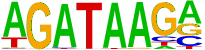

ISL2


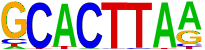

TEAD3


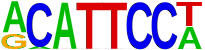

MEIS2


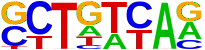

Isl1


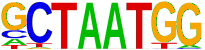

Bapx1(Homeobox)


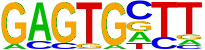

ATHB24(ZFHD)


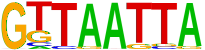

In [52]:
# Logos for HOMER
print('Top sequence logos outputted by HOMER for ISL1 dataset: \n')
print('GATA2')
display(SVG('homer-results/isl1/homerResults/motif1.logo.svg'))

print('ISL2')
display(SVG('homer-results/isl1/homerResults/motif2.logo.svg'))

print('TEAD3')
display(SVG('homer-results/isl1/homerResults/motif3.logo.svg'))

print('MEIS2')
display(SVG('homer-results/isl1/homerResults/motif4.logo.svg'))

print('Isl1')
display(SVG('homer-results/isl1/homerResults/motif5.logo.svg'))

print('Bapx1(Homeobox)')
display(SVG('homer-results/isl1/homerResults/motif6.logo.svg'))

print('ATHB24(ZFHD)')
display(SVG('homer-results/isl1/homerResults/motif7.logo.svg'))

***Sequence Logos From Pyxis For ISL1 Dataset:***

| Name of Motif | Sequence Logo |
| :---: | :-----------------: |
| NKX25_MOUSE.H11MO.0.A | <img src="../NKX25_MOUSE.H11MO.0.A_pyxis_logo.png" alt="NKX25_isl1_pyxis_logo" width="250"/> |
| ISL1_MOUSE.H11MO.0.A | <img src="../ISL1_MOUSE.H11MO.0.A_pyxis_logo.png" alt="ISL1_isl1_pyxis_logo" width="250"/> |
| LHX3_MOUSE.H11MO.0.C | <img src="../LHX3_MOUSE.H11MO.0.C_pyxis_logo.png" alt="LHX3_isl1_pyxis_logo" width="250"/> |
| BACH2_HUMAN.H11MO.0.A | <img src="../BACH2_HUMAN.H11MO.0.A_pyxis_logo.png" alt="BACH2_isl1_pyxis_logo" width="250"/> |
| NKX22_MOUSE.H11MO.0.A | <img src="../NKX22_MOUSE.H11MO.0.A_pyxis_logo.png" alt="NKX22_isl1_pyxis_logo" width="250"/> |
| KAISO_HUMAN.H11MO.1.A | <img src="../KAISO_HUMAN.H11MO.1.A_pyxis_logo.png" alt="KAISO_isl1_pyxis_logo" width="250"/> |
| MLX_HUMAN.H11MO.0.D | <img src="../MLX_HUMAN.H11MO.0.D_pyxis_logo.png" alt="MLX_isl1_pyxis_logo" width="250"/> |
| ALX3_HUMAN.H11MO.0.D | <img src="../ALX3_HUMAN.H11MO.0.D_pyxis_logo.png" alt="ALX3_isl1_pyxis_logo" width="250"/> |
| GATA4_MOUSE.H11MO.0.A | <img src="../GATA4_MOUSE.H11MO.0.A_pyxis_logo.png" alt="GATA4_isl1_pyxis_logo" width="250"/> |
| ELK1_HUMAN.H11MO.0.B | <img src="../ELK1_HUMAN.H11MO.0.B_pyxis_logo.png" alt="ELK1_isl1_pyxis_logo" width="250"/> |

Since I provided motifs from the source paper for the ISL1 dataset ([The multi-lineage transcription factor ISL1 controls cardiomyocyte cell fate through interaction with NKX2.5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10679653/)) as a reference for what we expect to find significant with `pyxis`, we have a sequence logo that actually matches between both `pyxis` and `findMotifsGenome.pl` this time compared to the example test files (ISL1). There are also other motifs we found significant that were also generated by HOMER (NKX25) which did not end up in the top 10 list, but were still outputted as sequence logos lower on the list. Overall, the results we get from enrichment with `pyxis` match similar enrichment significance seen in Figure 3D of the paper.

## II. Big O Behavior

The timeit commands for the 20 pseudopeak files are divided into 4 per cell for both tools to ensure faster execution of the command. The suffix of the pseudo.bed file (i.e. pseudo**1**.bed, pseudo**2**.bed, etc.) multiplied by 5 indicate how many peaks are in that file.

### Pyxis

In [20]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# All 20 pseudo peak files will be ran with the same isl1.pwms as used before, as well as a reference genome file pseudo.fa 
# which contains 10 chromosomes, all with 200 bp.
echo "Runtime for pseudo peak file 1: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo1.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 2: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo2.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 3: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo3.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 4: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo4.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'

Runtime for pseudo peak file 1: 
1 loop, best of 5: 2.82 sec per loop
Runtime for pseudo peak file 2: 
1 loop, best of 5: 2.54 sec per loop
Runtime for pseudo peak file 3: 
1 loop, best of 5: 2.48 sec per loop
Runtime for pseudo peak file 4: 
1 loop, best of 5: 2.46 sec per loop


In [21]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# Big O for pyxis (cont.)
echo "Runtime for pseudo peak file 5: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo5.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 6: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo6.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 7: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo7.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 8: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo8.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'

Runtime for pseudo peak file 5: 
1 loop, best of 5: 2.53 sec per loop
Runtime for pseudo peak file 6: 
1 loop, best of 5: 2.47 sec per loop
Runtime for pseudo peak file 7: 
1 loop, best of 5: 2.48 sec per loop
Runtime for pseudo peak file 8: 
1 loop, best of 5: 2.56 sec per loop


In [22]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# Big O for pyxis (cont.)
echo "Runtime for pseudo peak file 9: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo9.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 10: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo10.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 11: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo11.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 12: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo12.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'

Runtime for pseudo peak file 9: 
1 loop, best of 5: 2.6 sec per loop
Runtime for pseudo peak file 10: 
1 loop, best of 5: 2.56 sec per loop
Runtime for pseudo peak file 11: 
1 loop, best of 5: 2.61 sec per loop
Runtime for pseudo peak file 12: 
1 loop, best of 5: 2.57 sec per loop


In [23]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# Big O for pyxis (cont.)
echo "Runtime for pseudo peak file 13: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo13.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 14: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo14.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 15: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo15.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 16: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo16.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'

Runtime for pseudo peak file 13: 
1 loop, best of 5: 2.63 sec per loop
Runtime for pseudo peak file 14: 
1 loop, best of 5: 2.65 sec per loop
Runtime for pseudo peak file 15: 
1 loop, best of 5: 2.77 sec per loop
Runtime for pseudo peak file 16: 
1 loop, best of 5: 2.61 sec per loop


In [5]:
%%bash
DIR=`cat scriptpath.txt`
export PATH=$PATH:$DIR

# Big O for pyxis (cont.)
echo "Runtime for pseudo peak file 17: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo17.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 18: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo18.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 19: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo19.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'
echo "Runtime for pseudo peak file 20: "
python -m timeit -s 'import os' 'os.system("pyxis analysis/pseudopeaks/pseudo20.bed analysis/pseudo.fa benchmark/isl1.pwms> /dev/null")'

Runtime for pseudo peak file 17: 
1 loop, best of 5: 2.93 sec per loop
Runtime for pseudo peak file 18: 
1 loop, best of 5: 2.79 sec per loop
Runtime for pseudo peak file 19: 
1 loop, best of 5: 2.79 sec per loop
Runtime for pseudo peak file 20: 
1 loop, best of 5: 2.77 sec per loop


### HOMER

In [7]:
%%bash
# All 20 pseudo peak files will be ran with the same isl1.pwms as used before, as well as a reference genome file pseudo.fa 
# which contains 10 chromosomes, all with 200 bp.
echo "Runtime for pseudo peak file 1: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo1.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 2: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo2.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 3: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo3.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 4: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo4.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'

Runtime for pseudo peak file 1: 
1 loop, best of 1: 97.7 sec per loop
Runtime for pseudo peak file 2: 
1 loop, best of 1: 138 sec per loop
Runtime for pseudo peak file 3: 
1 loop, best of 1: 110 sec per loop
Runtime for pseudo peak file 4: 
1 loop, best of 1: 172 sec per loop


In [9]:
%%bash
echo "Runtime for pseudo peak file 5: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo5.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 6: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo6.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 7: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo7.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 8: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo8.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'

Runtime for pseudo peak file 5: 
1 loop, best of 1: 130 sec per loop
Runtime for pseudo peak file 6: 
1 loop, best of 1: 160 sec per loop
Runtime for pseudo peak file 7: 
1 loop, best of 1: 159 sec per loop
Runtime for pseudo peak file 8: 
1 loop, best of 1: 183 sec per loop


In [10]:
%%bash
echo "Runtime for pseudo peak file 9: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo9.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 10: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo10.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 11: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo11.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 12: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo12.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'

Runtime for pseudo peak file 9: 
1 loop, best of 1: 172 sec per loop
Runtime for pseudo peak file 10: 
1 loop, best of 1: 148 sec per loop
Runtime for pseudo peak file 11: 
1 loop, best of 1: 166 sec per loop
Runtime for pseudo peak file 12: 
1 loop, best of 1: 191 sec per loop


In [11]:
%%bash
echo "Runtime for pseudo peak file 13: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo13.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 14: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo14.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 15: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo15.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 16: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo16.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'

Runtime for pseudo peak file 13: 
1 loop, best of 1: 194 sec per loop
Runtime for pseudo peak file 14: 
1 loop, best of 1: 175 sec per loop
Runtime for pseudo peak file 15: 
1 loop, best of 1: 125 sec per loop
Runtime for pseudo peak file 16: 
1 loop, best of 1: 169 sec per loop


In [12]:
%%bash
echo "Runtime for pseudo peak file 17: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo17.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 18: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo18.bed analysis/pseudo.fa homer-results/pseudopeaks> /dev/null")'
echo "Runtime for pseudo peak file 19: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo19.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'
echo "Runtime for pseudo peak file 20: "
python -m timeit -r 1 -s 'import os' 'os.system("findMotifsGenome.pl analysis/pseudopeaks/pseudo20.bed analysis/pseudo.fa homer-results/pseudopeaks > /dev/null")'

### Visualizations

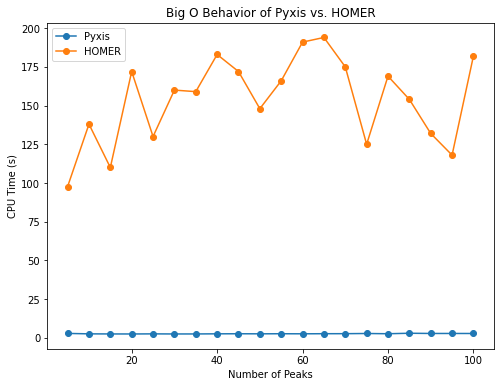

In [25]:
# Big O Behavior of number of peaks vs. CPU time in seconds
# mean runtimes taken from above commands
pyxis_runtimes = [2.82, 2.54, 2.48, 2.46, 2.53, 2.47, 2.48, 2.56, 2.6, 2.56, 2.61, 2.57, 2.63, 2.65, 2.77, 2.61, 2.93, 2.79, 2.79, 2.77]
homer_runtimes = [97.7, 138, 110, 172, 130, 160, 159, 183, 172, 148, 166, 191, 194, 175, 125, 169, 154, 132, 118, 182]

# number of peaks in dataset
num_peaks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

plt.figure(figsize=(8, 6))
# add annotation labels
#for i, (xi, yi) in enumerate(zip(num_peaks, homer_runtimes)):
#    plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')

# pyxis runtime
plt.plot(num_peaks, pyxis_runtimes, marker='o', linestyle='-')

# HOMER runtime
plt.plot(num_peaks, homer_runtimes, marker='o')

# add title, labels and legend
plt.title('Big O Behavior of Pyxis vs. HOMER')
plt.xlabel('Number of Peaks')
plt.ylabel('CPU Time (s)')
plt.legend(['Pyxis', 'HOMER'])

# save figure
plt.savefig('analysis/big_o_comparison.png')

plt.show()

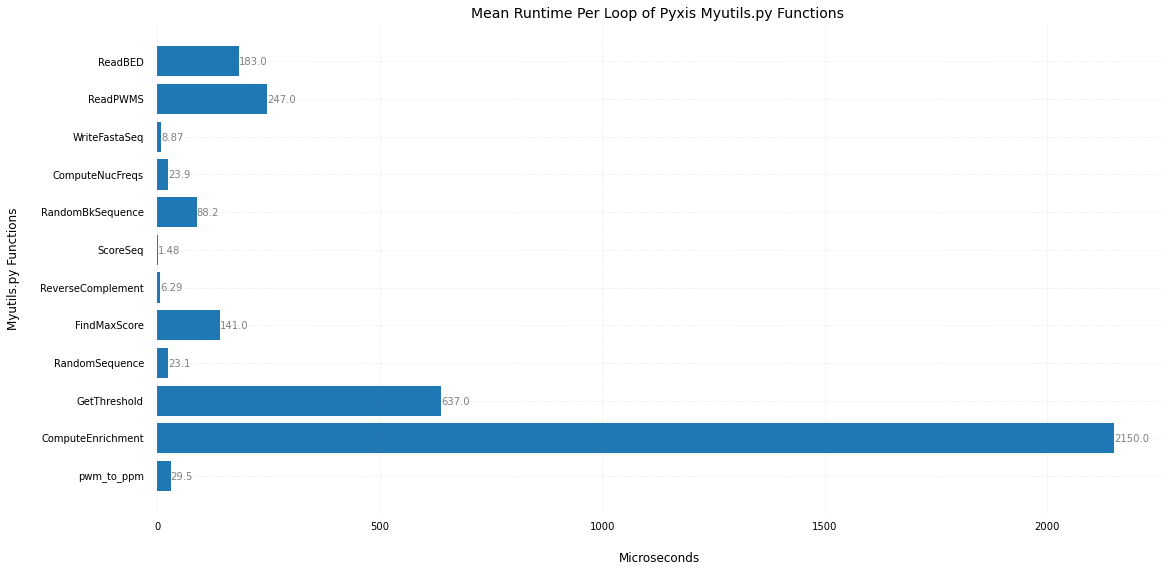

In [69]:
# Plotting Runtimes of Different Functions

# creating the dataset
data = {'ReadBED':183, 'ReadPWMS':247, 'WriteFastaSeq':8.87, 'ComputeNucFreqs':23.9, 'RandomBkSequence':88.2, 
        'ScoreSeq':1.48, 'ReverseComplement':6.29, 'FindMaxScore':141, 'RandomSequence':23.1, 'GetThreshold':637,
        'ComputeEnrichment':2150, 'pwm_to_ppm':29.5}
functions = list(data.keys())
runtimes = list(data.values())

fig, ax = plt.subplots(figsize =(18, 9))
# horizontal bar plot
ax.barh(functions, runtimes)
 
# remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# error bars
#error_bars = [9.18, 6.29, 0.139, 0.709, 1.15, 0.0145, 0.0468, 2, 2.67, 3.14, 280, 0.496]
#ax.errorbar(runtimes, functions, xerr=error_bars, color="black", linestyle='', solid_capstyle='projecting', capsize=5)

# show top values 
ax.invert_yaxis()
    
# add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='grey')

ax.set_title('Mean Runtime Per Loop of Pyxis Myutils.py Functions ',
             loc ='center', size=14)
ax.set_xlabel('Microseconds', size=12, labelpad=20)
ax.set_ylabel('Myutils.py Functions', size=12, labelpad=20)

# save figure
plt.savefig('analysis/function_runtimes.png')

plt.show()

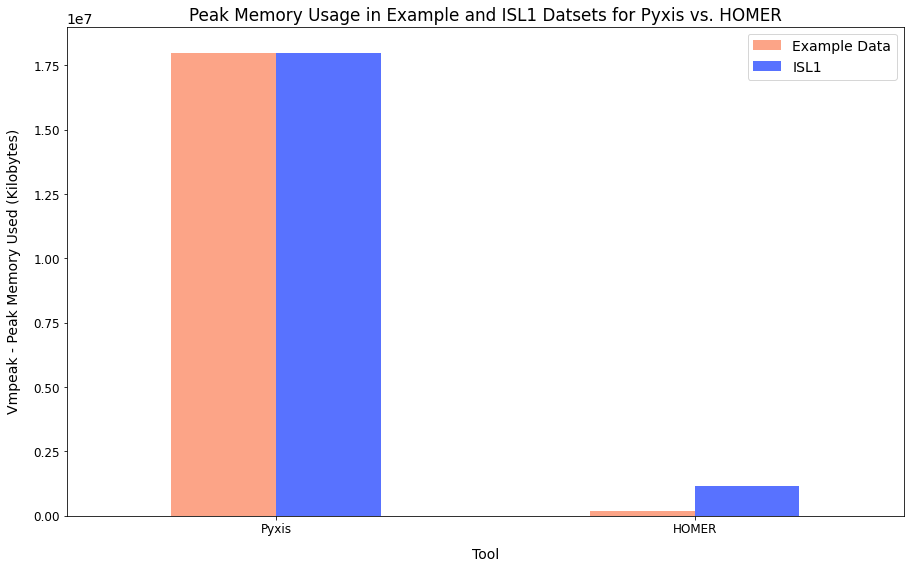

In [138]:
# Plotting Peak Memory Usage of pyxis vs. HOMER commands

# data definition
data = {'Example Data': [17959672, 167048],
        'ISL1': [17966576, 1146152]}
df = pd.DataFrame(data,columns=['Example Data', 'ISL1'], index = ['Pyxis', 'HOMER'])

# multiple bar chart
colors = ['#FCA487', '#5872FF']
df.plot.bar(figsize=(15,9), fontsize=12, color=colors,
            title='Peak Memory Usage in Example and ISL1 Datsets for Pyxis vs. HOMER', ylim=(0, 19000000))
plt.rcParams.update({'font.size': 14})
plt.tick_params(axis='x', labelrotation=0)
plt.savefig('analysis/peak_memory.png')
plt.xlabel(xlabel='Tool', labelpad=12)
plt.ylabel(ylabel='Vmpeak - Peak Memory Used (Kilobytes)', labelpad=12)

# display the plot
plt.show()